<a href="https://colab.research.google.com/github/jpmaldonadoc/Project-6220/blob/main/6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Python *Modules*

In [56]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Modules
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV



Upload Files

In [ ]:
!pip install pycaret

In [70]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jpmaldonadoc/Project-6220/main/heart_2020_cleaned%20-%20lv%20-%20Copy.csv')
df.head(n=25)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease
0,16.60,3,30,55-59,5,0
1,20.34,0,0,80 or older,7,0
2,26.58,20,30,65-69,8,0
3,24.21,0,0,75-79,6,0
4,23.71,28,0,40-44,8,0
5,28.87,6,0,75-79,12,1
6,21.63,15,0,70-74,4,0
7,31.64,5,0,80 or older,9,0
8,26.45,0,0,80 or older,5,0
9,40.69,0,0,65-69,10,0


In [71]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             4999 non-null   float64
 1   PhysicalHealth  4999 non-null   int64  
 2   MentalHealth    4999 non-null   int64  
 3   AgeCategory     4999 non-null   float64
 4   SleepTime       4999 non-null   int64  
 5   HeartDisease    4999 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 234.5 KB


Classes

In [73]:
y = df ['HeartDisease']
target = df['HeartDisease'].to_numpy()

Features

Data Matrix

In [74]:
X = df.iloc[:,0:5]
X.head(10)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,16.60,3,30,57.0,5
1,20.34,0,0,80.0,7
2,26.58,20,30,67.0,8
3,24.21,0,0,77.0,6
4,23.71,28,0,42.0,8
5,28.87,6,0,77.0,12
6,21.63,15,0,72.0,4
7,31.64,5,0,80.0,9
8,26.45,0,0,80.0,5
9,40.69,0,0,67.0,10


In [75]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,4999.0,29.223921,6.606925,12.48,24.55,28.19,32.89,75.82
PhysicalHealth,4999.0,4.049210,8.511390,0.00,0.00,0.00,3.00,30.00
MentalHealth,4999.0,4.284857,8.442191,0.00,0.00,0.00,4.00,30.00
AgeCategory,4999.0,55.310662,17.212165,21.00,42.00,57.00,67.00,80.00
SleepTime,4999.0,7.068414,1.573757,1.00,6.00,7.00,8.00,20.00


In [76]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,29.223921,6.606925,12.480000,24.550000,28.190000,32.890000,75.820000
PhysicalHealth,4.049210,8.511390,0.000000,0.000000,0.000000,3.000000,30.000000
MentalHealth,4.284857,8.442191,0.000000,0.000000,0.000000,4.000000,30.000000
AgeCategory,55.310662,17.212165,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.068414,1.573757,1.000000,6.000000,7.000000,8.000000,20.000000


*Notice that the data is not standardized. So we need to standarize it.*

---



In [77]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,4999.0,-1.465788e-17,1.0001,-2.534552,-0.707498,-0.156506,0.554940,7.053318
PhysicalHealth,4999.0,-1.447465e-15,1.0001,-0.475788,-0.475788,-0.475788,-0.123284,3.049254
MentalHealth,4999.0,1.628357e-16,1.0001,-0.507604,-0.507604,-0.507604,-0.033745,3.046332
AgeCategory,4999.0,3.712884e-16,1.0001,-1.993596,-0.773406,0.098158,0.679200,1.434556
SleepTime,4999.0,-8.947967e-17,1.0001,-3.856390,-0.678962,-0.043476,0.592010,8.217838


**Observations and variables**

In [79]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

Class Distribution

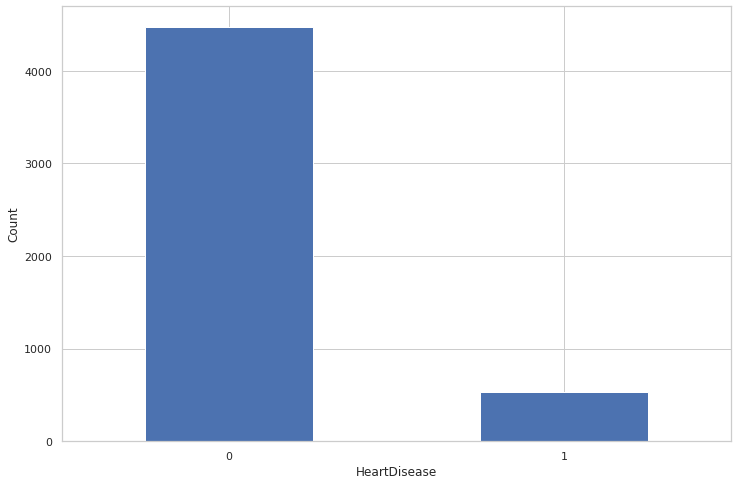

In [80]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

Box & Whisker Plots

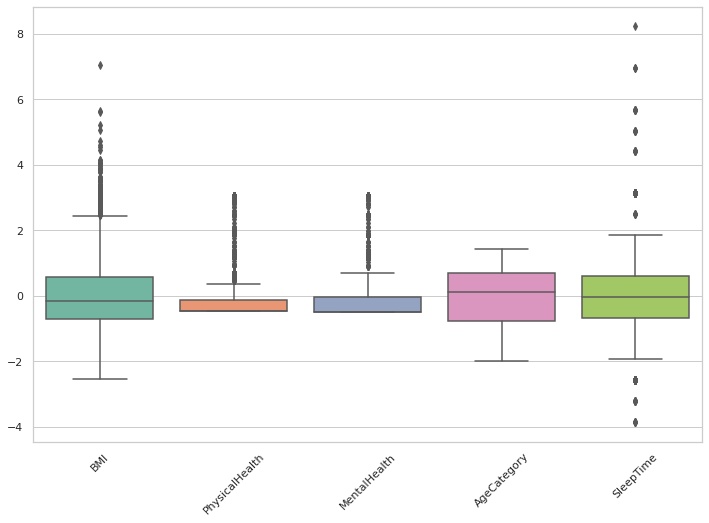

In [81]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

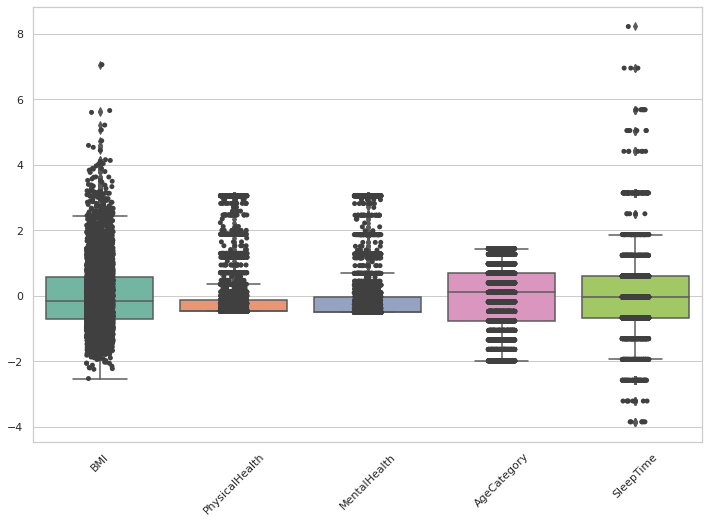

In [82]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Five Number Summary

In [129]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03,4.999000e+03
mean,-1.465788e-17,-1.447465e-15,1.628357e-16,3.712884e-16,-8.947967e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.534552e+00,-4.757877e-01,-5.076035e-01,-1.993596e+00,-3.856390e+00
25%,-7.074984e-01,-4.757877e-01,-5.076035e-01,-7.734061e-01,-6.789616e-01
50%,-1.565061e-01,-4.757877e-01,-5.076035e-01,9.815772e-02,-4.347591e-02
75%,5.549399e-01,-1.232836e-01,-3.374544e-02,6.792003e-01,5.920098e-01
max,7.053318e+00,3.049254e+00,3.046332e+00,1.434556e+00,8.217838e+00


Pair Plot

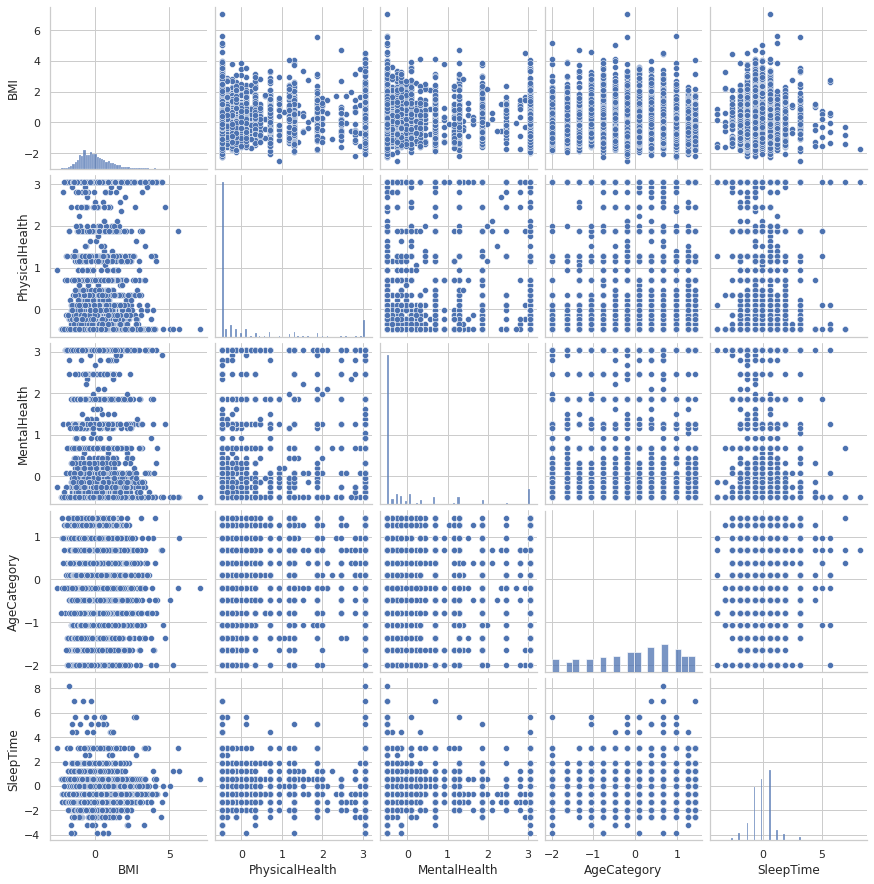

In [84]:
sns.pairplot(df)

Covariance

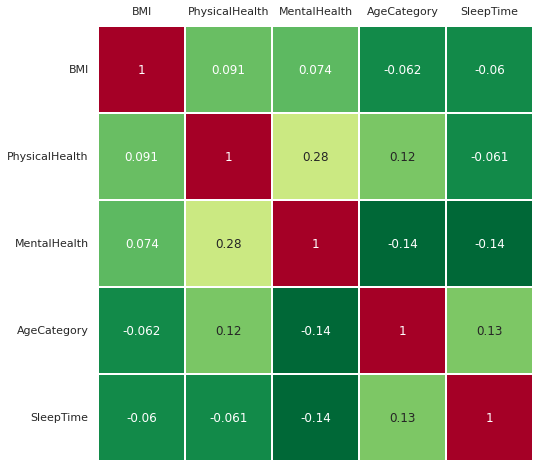

In [85]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

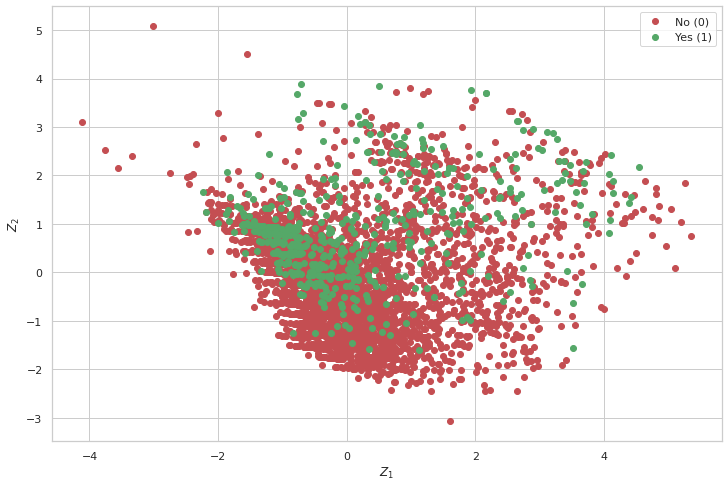

In [86]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(No)->0,  2(Yes)->1
idx_No = np.where(y == 0)
idx_Yes = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_No,0], Z[idx_No,1], c='r', label='No (0)')
plt.scatter(Z[idx_Yes,0], Z[idx_Yes,1], c='g', label='Yes (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

Eigenvectors

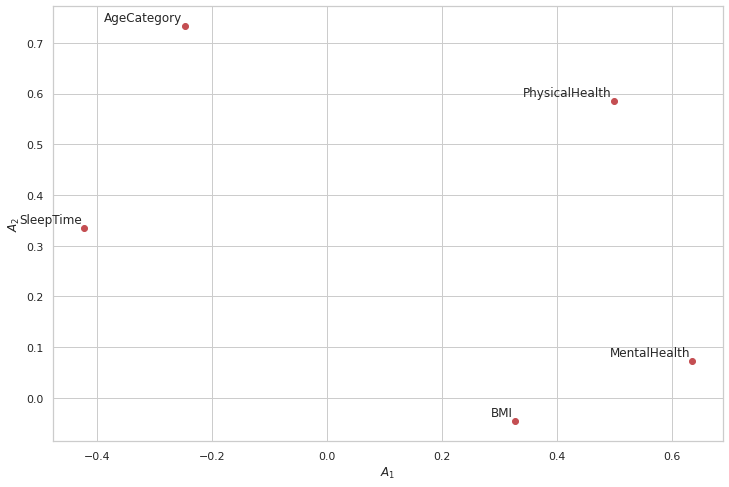

In [87]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


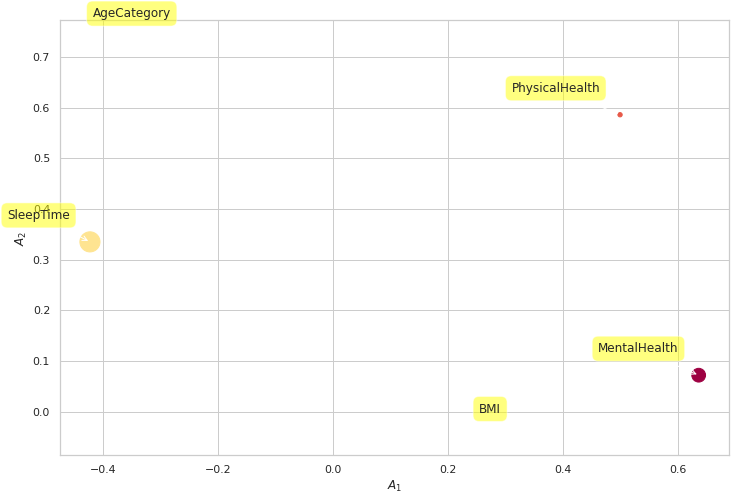

In [88]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

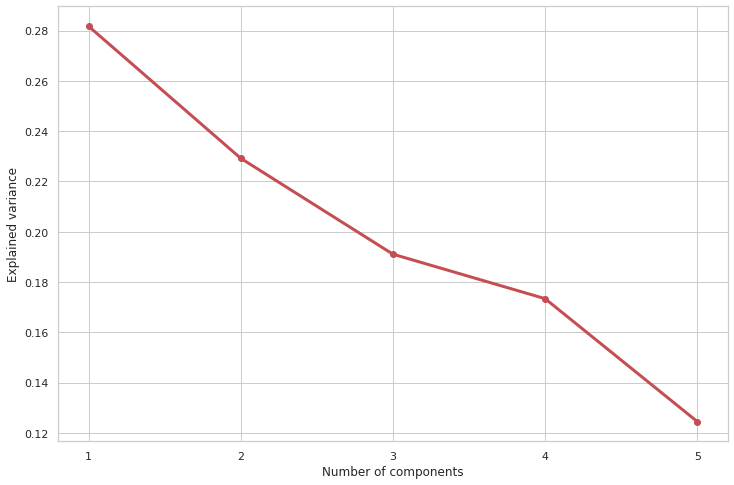

In [89]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

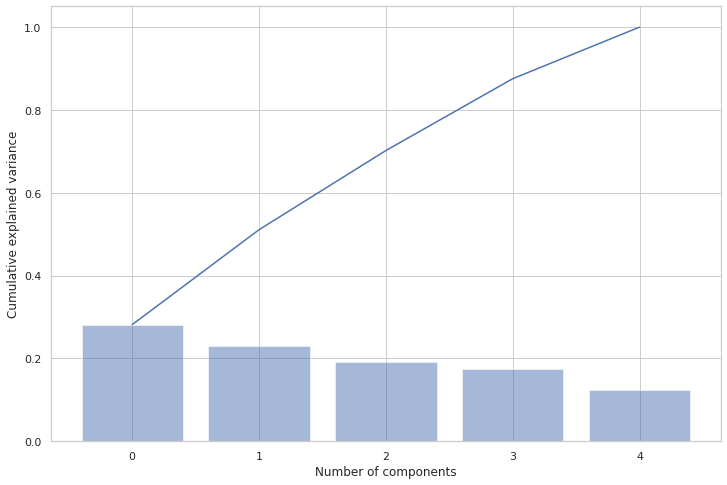

In [90]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Explained Variance per PC

In [91]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (28.2%)',
 '1': 'PC 2 (22.9%)',
 '2': 'PC 3 (19.1%)',
 '3': 'PC 4 (17.3%)',
 '4': 'PC 5 (12.5%)'}

Biplot

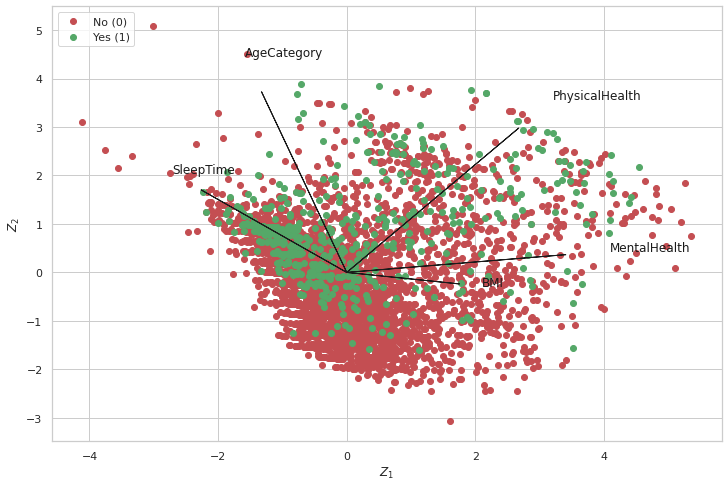

In [92]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_No,0], Z[idx_No,1], c='r', label='No (0)')
plt.scatter(Z[idx_Yes,0], Z[idx_Yes,1], c='g', label='Yes (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Using PCA Librarry

In [140]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=55498b5d2ba43cdd414df5ffedb9c9ea45a5c15733a0bbdd629e764f010df424
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [93]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=4, normalize=True)
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [94]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC         feature   loading  type
0  PC1    MentalHealth  0.635764  best
1  PC2     AgeCategory  0.732976  best
2  PC3             BMI  0.934436  best
3  PC4       SleepTime  0.808817  best
4  PC2  PhysicalHealth  0.585759  weak


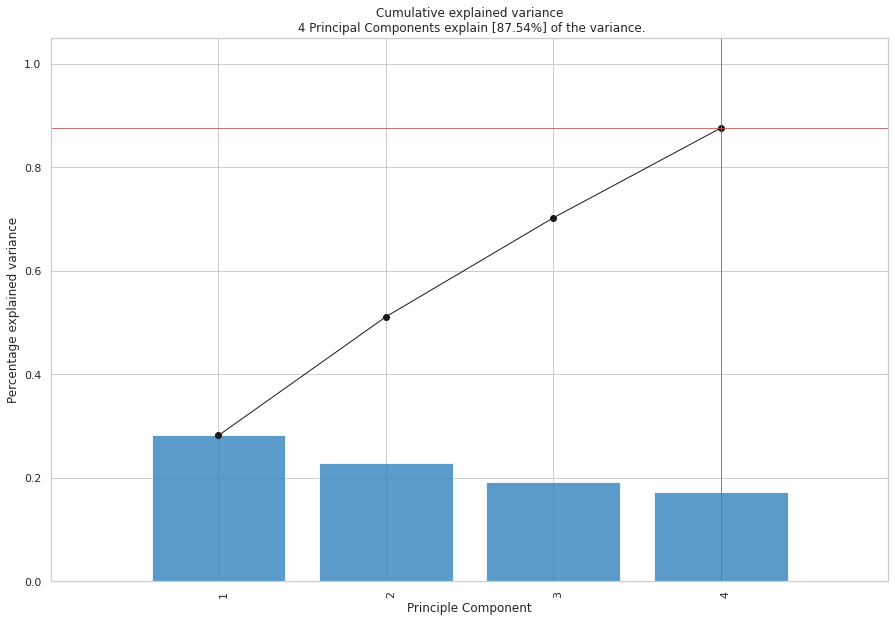

<Figure size 864x576 with 0 Axes>

In [95]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


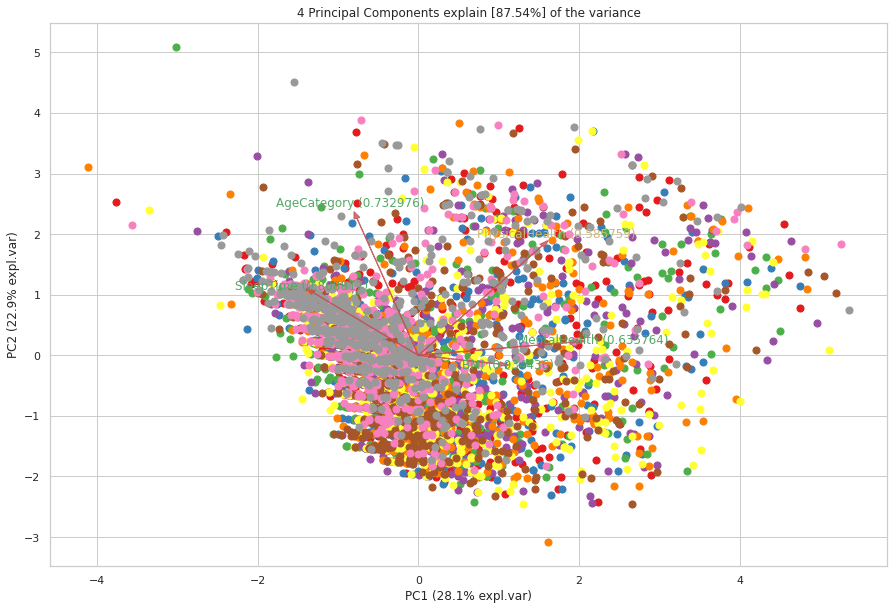

In [96]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


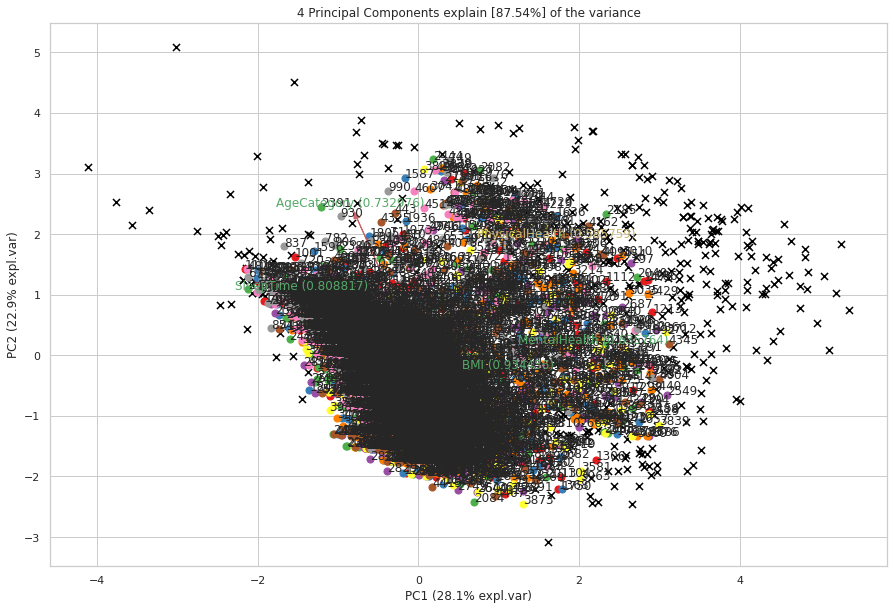

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ac746ab90>)

In [97]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


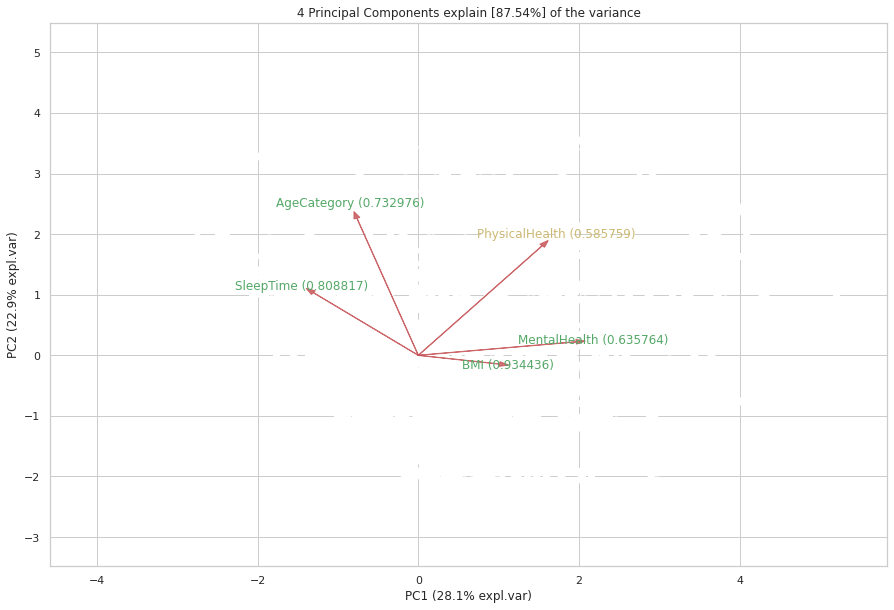

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ad255ff10>)

In [98]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


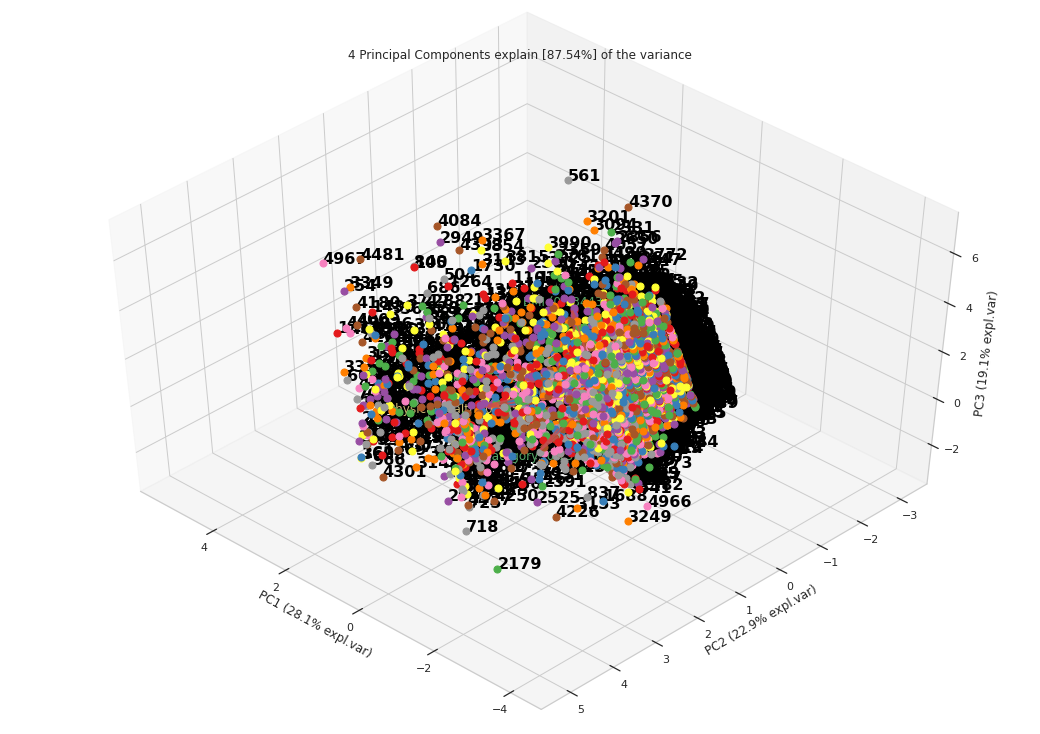

In [99]:
ax = model.biplot3d(legend=False)

Principal components

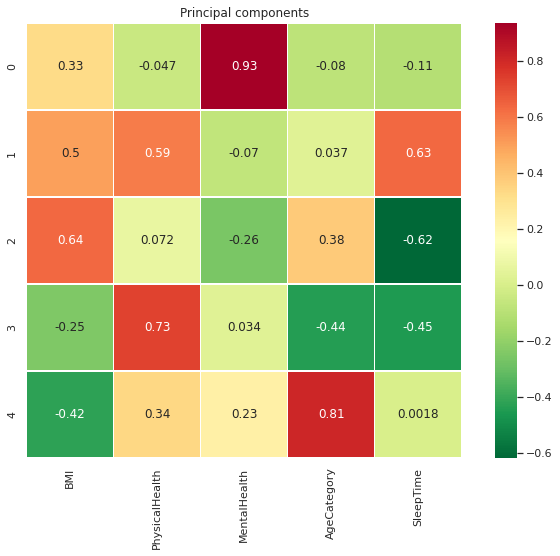

PC1:[ 0.32698207  0.49902952  0.63576425 -0.24728681 -0.42273553]
PC2:[-0.04668853  0.58575907  0.07210901  0.73297639  0.3350409 ]


In [107]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

Hostelling's T2 Test

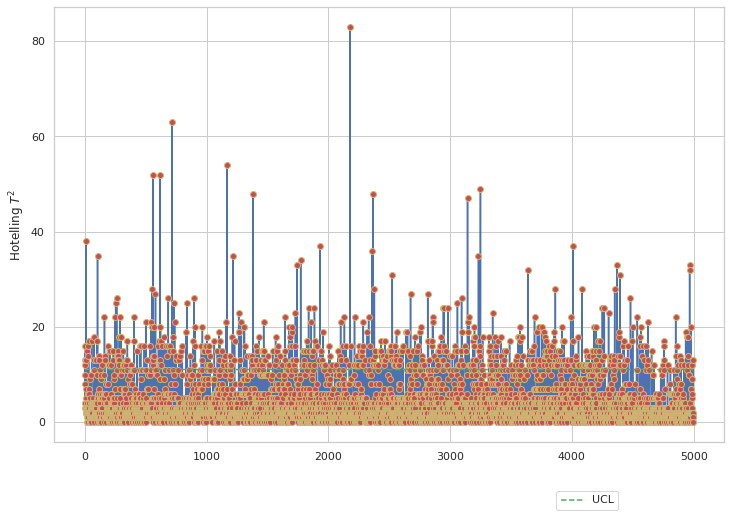

In [108]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2= p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [109]:
print(np.argwhere(Tsquare>UCL))

[[   0]
 [   2]
 [   4]
 [  10]
 [  14]
 [  17]
 [  23]
 [  25]
 [  32]
 [  57]
 [  78]
 [  80]
 [  90]
 [ 101]
 [ 105]
 [ 115]
 [ 119]
 [ 121]
 [ 138]
 [ 162]
 [ 165]
 [ 166]
 [ 188]
 [ 200]
 [ 206]
 [ 216]
 [ 229]
 [ 235]
 [ 250]
 [ 254]
 [ 262]
 [ 263]
 [ 267]
 [ 270]
 [ 272]
 [ 273]
 [ 277]
 [ 278]
 [ 279]
 [ 281]
 [ 284]
 [ 288]
 [ 296]
 [ 315]
 [ 317]
 [ 326]
 [ 335]
 [ 336]
 [ 343]
 [ 350]
 [ 378]
 [ 404]
 [ 406]
 [ 430]
 [ 451]
 [ 459]
 [ 489]
 [ 504]
 [ 508]
 [ 538]
 [ 543]
 [ 551]
 [ 553]
 [ 559]
 [ 560]
 [ 561]
 [ 564]
 [ 570]
 [ 572]
 [ 581]
 [ 605]
 [ 606]
 [ 616]
 [ 618]
 [ 622]
 [ 625]
 [ 629]
 [ 636]
 [ 650]
 [ 668]
 [ 673]
 [ 680]
 [ 686]
 [ 700]
 [ 703]
 [ 718]
 [ 725]
 [ 727]
 [ 733]
 [ 738]
 [ 747]
 [ 749]
 [ 750]
 [ 774]
 [ 783]
 [ 789]
 [ 801]
 [ 833]
 [ 840]
 [ 868]
 [ 891]
 [ 896]
 [ 897]
 [ 905]
 [ 908]
 [ 958]
 [ 964]
 [ 966]
 [ 968]
 [ 977]
 [ 987]
 [ 998]
 [1002]
 [1006]
 [1009]
 [1015]
 [1020]
 [1022]
 [1027]
 [1029]
 [1064]
 [1089]
 [1100]
 [1103]
 [1108]


Control Charts for Principal Components

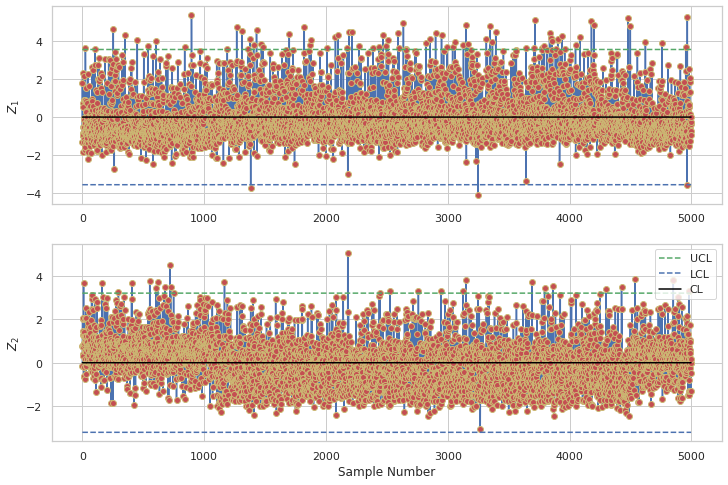

In [110]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

Out of Control Points

In [111]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[[1382]
 [3249]
 [4966]]
[[  25]
 [ 105]
 [ 254]
 [ 350]
 [ 451]
 [ 538]
 [ 606]
 [ 840]
 [ 896]
 [1190]
 [1267]
 [1311]
 [1358]
 [1375]
 [1406]
 [1430]
 [1470]
 [1482]
 [1699]
 [1822]
 [1869]
 [1878]
 [2007]
 [2078]
 [2098]
 [2173]
 [2190]
 [2215]
 [2272]
 [2385]
 [2434]
 [2467]
 [2497]
 [2508]
 [2592]
 [2601]
 [2636]
 [2656]
 [2821]
 [2854]
 [2900]
 [2949]
 [2995]
 [3040]
 [3058]
 [3129]
 [3150]
 [3164]
 [3317]
 [3349]
 [3367]
 [3394]
 [3643]
 [3710]
 [3717]
 [3773]
 [3793]
 [3836]
 [3849]
 [3854]
 [3887]
 [3902]
 [3903]
 [3937]
 [3960]
 [4049]
 [4084]
 [4180]
 [4200]
 [4481]
 [4499]
 [4623]
 [4758]
 [4954]
 [4967]]
[]
[[  10]
 [ 162]
 [ 296]
 [ 406]
 [ 553]
 [ 605]
 [ 618]
 [ 680]
 [ 718]
 [ 725]
 [1167]
 [2179]
 [2444]
 [2525]
 [2759]
 [2945]
 [3125]
 [3148]
 [3693]
 [3795]
 [3864]
 [4301]
 [4427]
 [4537]
 [4852]
 [4979]]


**Machine Learning**

In [119]:
fig = px.imshow(df[['BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

In [122]:
features = df[['BMI','PhysicalHealth', 'MentalHealth', 'AgeCategory',
       'PhysicalActivity', 'SleepTime']

labels = df['BMI']


SyntaxError: ignored

Multi-Class Classification

In [124]:
# Test-Train Split
#No funciona
X_train, X_test, y_train, y_test = train_test_split(df, y , test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

TypeError: ignored

Gaussian Naive Bayes (GNB)

In [125]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

NameError: ignored